In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import cumulative_trapezoid
from scipy.optimize import minimize

def compute_xy_coordinates(s, theta, x_s_a=0, y_s_a=0):
    """
    Compute x(s), y(s) from s and theta(s), starting at (x_s_a, y_s_a).
    Returns x, y.
    """
    dx_ds = np.cos(theta)
    x = cumulative_trapezoid(dx_ds, s, initial=x_s_a)

    dy_ds = np.sin(theta)
    y = cumulative_trapezoid(dy_ds, s, initial=y_s_a)

    return x, y

def plot_xy_coordinates(s, theta, x, y, x_s_a=0, y_s_a=0, 
                        ax_theta=None, ax_xy=None, title_prefix=""):
    """
    Plot theta(s) and y(x) on provided axes.
    """
    ax_theta.plot(s, theta)
    ax_theta.set_title(f"{title_prefix}$\\theta(s)$")
    ax_theta.set_ylabel("$\\theta$")
    ax_theta.set_xlabel("s")
    ax_theta.axis('equal')
    ax_theta.grid()

    ax_xy.plot(x, y)
    ax_xy.set_title(f"{title_prefix}y(x)")
    ax_xy.set_ylabel("y")
    ax_xy.set_xlabel("x")
    ax_xy.axis('equal')
    ax_xy.grid()
    ax_xy.scatter(x_s_a, y_s_a)
    ax_xy.annotate("$s_a$", (x_s_a, y_s_a), xytext=(x_s_a-0.035, y_s_a+0.01))

def compare_xy_coordinates(s1, theta1, s2, theta2, x_s_a=0, y_s_a=0):
    """
    Compute and plot two sets of (theta, x, y) side by side:
    - left: s1, theta1
    - right: s2, theta2
    """
    x1, y1 = compute_xy_coordinates(s1, theta1, x_s_a, y_s_a)
    x2, y2 = compute_xy_coordinates(s2, theta2, x_s_a, y_s_a)

    fig, axs = plt.subplots(2, 2, figsize=(12,6))

    # Left plots
    plot_xy_coordinates(s1, theta1, x1, y1, x_s_a, y_s_a, 
                        ax_theta=axs[0,0], ax_xy=axs[1,0], 
                        title_prefix="Initial guess: ")

    # Right plots
    plot_xy_coordinates(s2, theta2, x2, y2, x_s_a, y_s_a, 
                        ax_theta=axs[0,1], ax_xy=axs[1,1], 
                        title_prefix="Calculated: ")

    plt.tight_layout()
    plt.show()


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import cumulative_trapezoid

def compute_xy_coordinates(s, theta, x_s_a=0, y_s_a=0):
    """
    Compute x(s), y(s) from s and theta(s), starting at (x_s_a, y_s_a).
    Returns x, y.
    """
    dx_ds = np.cos(theta)
    x = cumulative_trapezoid(dx_ds, s, initial=x_s_a)

    dy_ds = np.sin(theta)
    y = cumulative_trapezoid(dy_ds, s, initial=y_s_a)

    return x, y

def plot_xy_coordinates(s, theta, x, y, x_s_a=0, y_s_a=0, ax_theta=None, ax_xy=None, title_prefix=""):
    """
    Plot theta(s) and y(x) on provided axes.
    """
    ax_theta.plot(s, theta)
    ax_theta.set_title(f"{title_prefix}$\\theta(s)$")
    ax_theta.set_ylabel("$\\theta$")
    ax_theta.set_xlabel("s")
    ax_theta.axis('equal')
    ax_theta.grid()

    ax_xy.plot(x, y)
    ax_xy.set_title(f"{title_prefix}y(x)")
    ax_xy.set_ylabel("y")
    ax_xy.set_xlabel("x")
    ax_xy.axis('equal')
    ax_xy.grid()
    ax_xy.scatter(x_s_a, y_s_a)
    ax_xy.annotate("$s_a$", (x_s_a, y_s_a), xytext=(x_s_a-0.035, y_s_a+0.01))

def compare_xy_coordinates(s1, theta1, s2, theta2, x_s_a=0, y_s_a=0):
    """
    Compute and plot two sets of (theta, x, y) side by side:
    - left: s1, theta1
    - right: s2, theta2
    """
    x1, y1 = compute_xy_coordinates(s1, theta1, x_s_a, y_s_a)
    x2, y2 = compute_xy_coordinates(s2, theta2, x_s_a, y_s_a)

    fig, axs = plt.subplots(2, 2, figsize=(12,6))

    # Left plots
    plot_xy_coordinates(s1, theta1, x1, y1, x_s_a, y_s_a, ax_theta=axs[0,0], ax_xy=axs[1,0], title_prefix="Initial guess: ")

    # Right plots
    plot_xy_coordinates(s2, theta2, x2, y2, x_s_a, y_s_a, ax_theta=axs[0,1], ax_xy=axs[1,1], title_prefix="Calculated: ")

    plt.tight_layout()
    plt.show()


Optimization terminated successfully    (Exit mode 0)
            Current function value: 4900.000086432487
            Iterations: 15
            Function evaluations: 1588
            Gradient evaluations: 15
Energy: 4900.000086


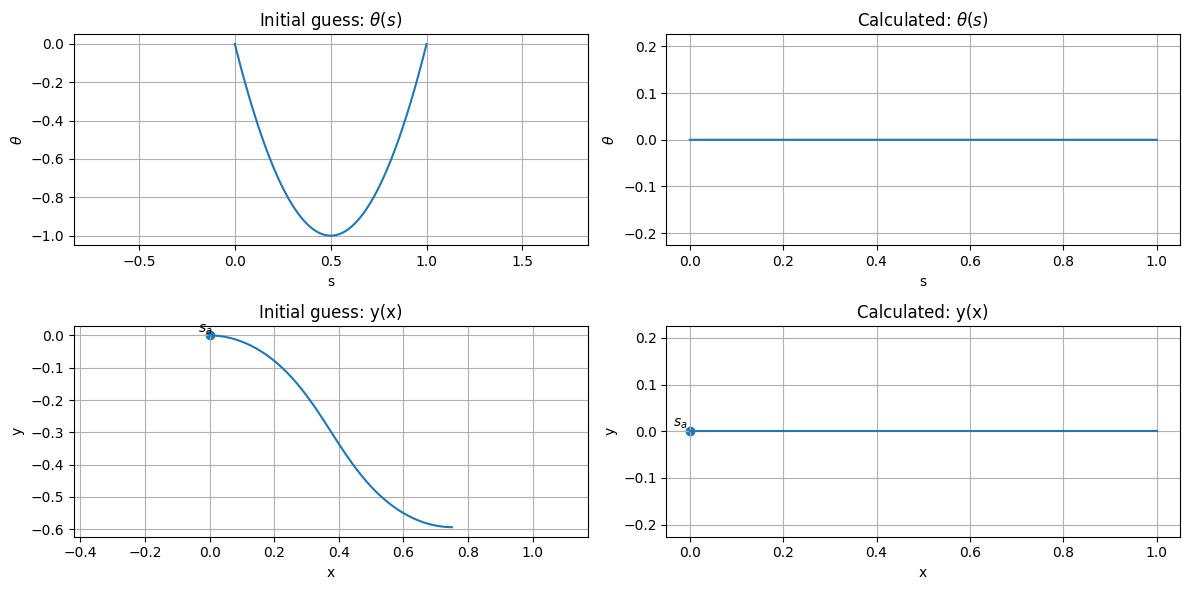

In [8]:
def beam_energy(y, ds, E, I_b, Tx):
    n = len(y)

    sum1 = 0
    for i in range(n-2):
        sum1 += (y[i+2]-2*y[i+1]-y[i])**2 / ds**2

    sum2 = 0
    for i in range(n-1):
        sum2 += np.cos((y[i+1]-y[i])/2)

    V = E * I_b * sum1 + Tx * (1-sum2)
    return V

E = 1
I_b = 1
Tx = -50
length = 1
n = 100
s, ds = np.linspace(0, length, n, retstep=True)
y0 = np.linspace(-1, 1, n)**2-1

sol = minimize(
    beam_energy, 
    y0, 
    (ds, E, I_b, Tx), 
    constraints=({"type": "eq", "fun": lambda y: y[ 0]}, 
                 {"type": "eq", "fun": lambda y: y[-1]}),
    options={"maxiter": 200, "disp": True}
)

y_min = sol.x

print("Energy:", round(beam_energy(sol.x, ds, E, I_b, Tx), 6))
compare_xy_coordinates(s, y0, s, y_min)

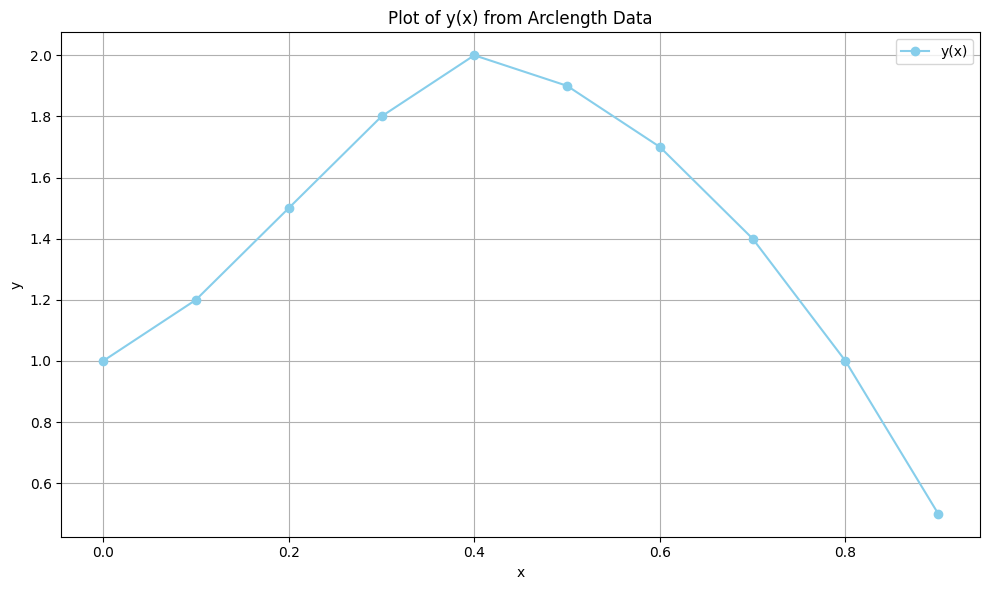

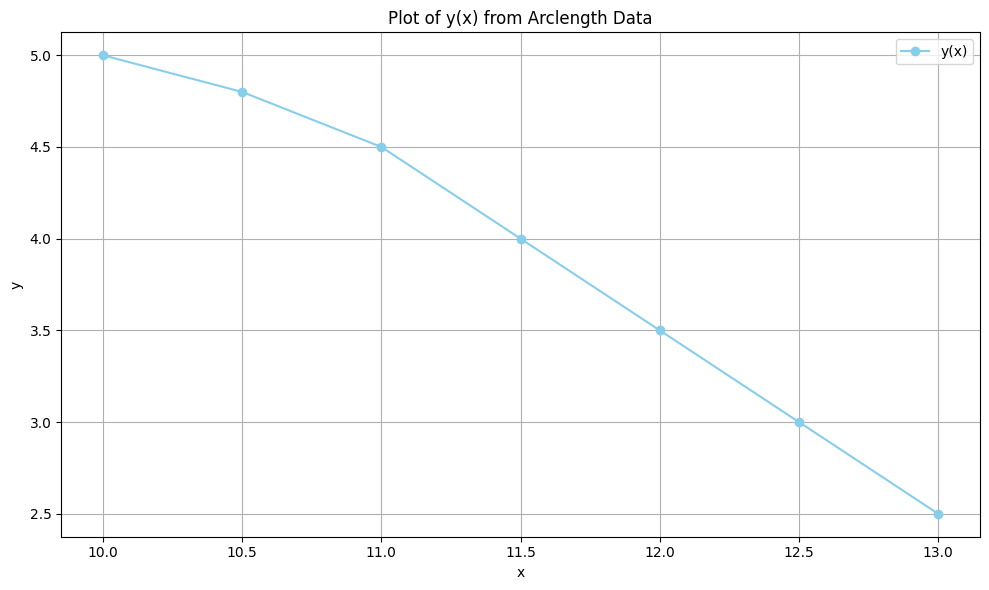

In [6]:
import matplotlib.pyplot as plt

def plot_y_from_arclength(y_values: list[float], ds: float, x_start: float = 0.0):
    """
    Plots y(x) given a list of y values along an arclength s, with a constant ds.

    Args:
        y_values (list[float]): A list of y-coordinate values.
        ds (float): The constant step size between consecutive x-values.
        x_start (float, optional): The starting x-coordinate value. Defaults to 0.0.
    """
    if not y_values:
        print("Error: y_values list cannot be empty.")
        return

    # Calculate x_values based on ds and x_start
    x_values = [x_start + i * ds for i in range(len(y_values))]

    # Create the plot
    plt.figure(figsize=(10, 6)) # Set figure size for better readability
    plt.plot(x_values, y_values, marker='o', linestyle='-', color='skyblue', label='y(x)')

    # Add labels and title
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Plot of y(x) from Arclength Data')
    plt.grid(True) # Add a grid for easier reading
    plt.legend() # Show the legend
    plt.tight_layout() # Adjust layout to prevent labels from overlapping
    plt.show()

#Example Usage:
y_data = [1.0, 1.2, 1.5, 1.8, 2.0, 1.9, 1.7, 1.4, 1.0, 0.5]
step_size = 0.1
start_x = 0.0

plot_y_from_arclength(y_data, step_size, start_x)

#Another example with a different start_x
y_data_2 = [5, 4.8, 4.5, 4.0, 3.5, 3.0, 2.5]
step_size_2 = 0.5
start_x_2 = 10.0

plot_y_from_arclength(y_data_2, step_size_2, start_x_2)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 173159.97509366795
            Iterations: 192
            Function evaluations: 29589
            Gradient evaluations: 192
Energy: 173159.975094


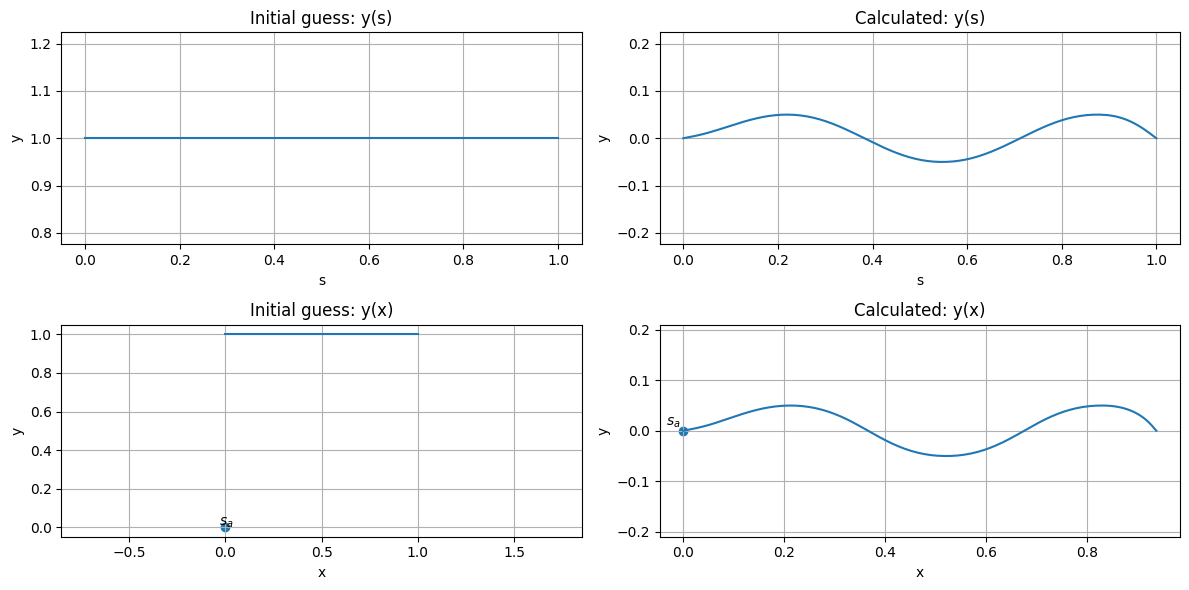

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

def compute_xy_from_y_ds(y_coords, ds, x_s_a=0, y_s_a=0):
    """
    Given y-coordinates and arc length spacing ds, compute x and y assuming arc-length spacing.
    Returns x, y starting from (x_s_a, y_s_a).
    """
    y_coords = np.array(y_coords)
    y = y_coords + y_s_a  # offset y if needed
    x = [x_s_a]

    for i in range(1, len(y)):
        dy = y[i] - y[i - 1]
        dx = np.sqrt(max(ds**2 - dy**2, 0))
        x.append(x[-1] + dx)

    return np.array(x), y

def plot_xy_from_y_ds(y_coords1, ds1, y_coords2, ds2, x_s_a=0, y_s_a=0):
    """
    Compare two sets of y-coordinates generated with arc length spacing:
    - Left: initial guess (y_coords1, ds1)
    - Right: calculated (y_coords2, ds2)
    """
    x1, y1 = compute_xy_from_y_ds(y_coords1, ds1, x_s_a, y_s_a)
    x2, y2 = compute_xy_from_y_ds(y_coords2, ds2, x_s_a, y_s_a)

    s1 = np.arange(len(y1)) * ds1
    s2 = np.arange(len(y2)) * ds2

    fig, axs = plt.subplots(2, 2, figsize=(12, 6))

    # Left: initial guess
    axs[0, 0].plot(s1, y1)
    axs[0, 0].set_title("Initial guess: y(s)")
    axs[0, 0].set_xlabel("s")
    axs[0, 0].set_ylabel("y")
    axs[0, 0].grid()
    axs[0, 0].axis('equal')

    axs[1, 0].plot(x1, y1)
    axs[1, 0].set_title("Initial guess: y(x)")
    axs[1, 0].set_xlabel("x")
    axs[1, 0].set_ylabel("y")
    axs[1, 0].grid()
    axs[1, 0].axis('equal')
    axs[1, 0].scatter(x_s_a, y_s_a)
    axs[1, 0].annotate("$s_a$", (x_s_a, y_s_a), xytext=(x_s_a - 0.035, y_s_a + 0.01))

    # Right: calculated
    axs[0, 1].plot(s2, y2)
    axs[0, 1].set_title("Calculated: y(s)")
    axs[0, 1].set_xlabel("s")
    axs[0, 1].set_ylabel("y")
    axs[0, 1].grid()
    axs[0, 1].axis('equal')

    axs[1, 1].plot(x2, y2)
    axs[1, 1].set_title("Calculated: y(x)")
    axs[1, 1].set_xlabel("x")
    axs[1, 1].set_ylabel("y")
    axs[1, 1].grid()
    axs[1, 1].axis('equal')
    axs[1, 1].scatter(x_s_a, y_s_a)
    axs[1, 1].annotate("$s_a$", (x_s_a, y_s_a), xytext=(x_s_a - 0.035, y_s_a + 0.01))

    plt.tight_layout()
    plt.show()

def beam_energy(y, ds, E, I_b, Tx):
    """
    Beam energy functional: bending energy + potential due to horizontal tension.
    """
    n = len(y)

    sum1 = 0
    for i in range(n - 2):
        sum1 += (y[i+2] - 2*y[i+1] + y[i])**2 / ds**2

    sum2 = 0
    for i in range(n - 1):
        dy = (y[i+1] - y[i]) / 2
        sum2 += np.cos(dy)

    V = E * I_b * sum1 + Tx * (1 - sum2)
    return V

# Parameters
E = 1
I_b = 1
Tx = -1170
length = 1
n = 150
h = 0.05
s, ds = np.linspace(0, length, n, retstep=True)

# Initial guess: parabolic shape
y0 = np.ones(n)

# Optimization
sol = minimize(
    beam_energy,
    y0,
    args=(ds, E, I_b, Tx),
    constraints=([
        {"type": "eq", "fun": lambda y: y[0]},
        {"type": "eq", "fun": lambda y: y[-1]},
    ]),
    options={"maxiter": 300, "disp": True},
    bounds=tuple((-h, h) for _ in range(n))
)

y_min = sol.x

print("Energy:", round(beam_energy(y_min, ds, E, I_b, Tx), 6))
plot_xy_from_y_ds(y0, ds, y_min, ds)